## Titanic Dataset

## Topic will be covered

The framework of this notebook is: 

1. Explorotary data analysis\
    1) NaN Values\
    2) Survived\
    3) Pclass\
    4) Name Column\
    5) Age Column\
    6) Sex Column
    
2. Hypothesis\
    1) Determine if the survival rate is associated to the class of passenger\
    2) Determine if the survival rate is associated to the gender\
    3) Determine the survival rate is associated to the age

In [58]:
import pandas as pd
import numpy as np
import pickle

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Enable Jupyter Notebook's intellisense
%config IPCompleter.greedy=True

# We want to see whole content (non-truncated)
pd.set_option('display.max_colwidth', None)

In [59]:
df = pd.read_csv("titanic.csv")
display(df.head())

print(df.info())
print(df.describe())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

# Exploratory Data Analysis

### NaN values

In [60]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


From the records, we can see that 4 features have missing values:

Age: Age is fractional if less than 1. -> Numerical Variable \
Cabin: Cabin number -> Categorical variable\
Embarked: Port of Embarkation (3 categories) -> Categorical variable\
Fare: Numerical: Only 1 missing in the test dataset. Can be replace by the mean in the training set.

### Survived

342 people survived
549 people didn't survive


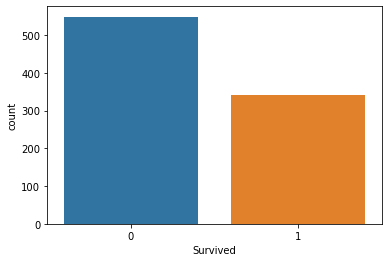

0    0.616162
1    0.383838
Name: Survived, dtype: float64


In [61]:
#COUNT THE SURVIVOURS AND UNSURVIVOURS
survivours = df.Survived.sum()
unsurvivours = len(df) - survivours

print(survivours, "people survived")
print(unsurvivours, "people didn't survive")

#Visualize Survived column. (1=Survived, 0=Not Survived)
sns.countplot(x="Survived", data=df)
plt.show()

#PRINT PROPORTIONS
print(df["Survived"].value_counts(normalize=True))


### Pclass
Pclass column contains the status of the passengers. \
1 = Upper\
2 = Middle\
3 = Lower

<AxesSubplot:xlabel='Survived', ylabel='count'>

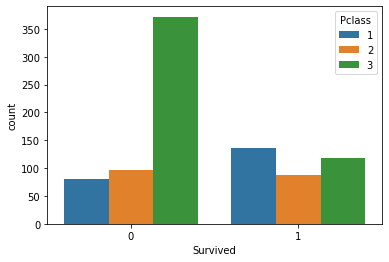

In [62]:
#hue parameter represents which column in the data frame, you want to use for color encoding.
sns.countplot(x="Survived",hue="Pclass",data=df) 



### Name Column

In [63]:
# Display first five rows of the Name column
display(df[["Name"]].head())

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)"
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"


### Age Column

In [64]:
# Print the missing values in Age column
print(df["Age"].isnull().sum())

177


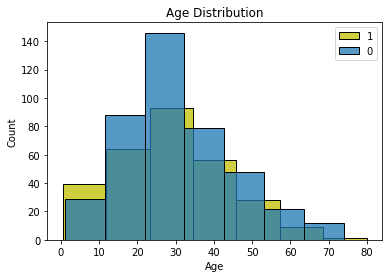

In [65]:
# There are 177 missing values in Age column. Now, let's look at the distribution of ages by surviving

# Survived by age
sns.histplot(df[df.Survived==1]["Age"],color="y", bins=7, label="1")

# Death by age
sns.histplot(df[df.Survived==0]["Age"], bins=7, label="0")
plt.legend()
plt.title("Age Distribution")
plt.show()

### Sex Column

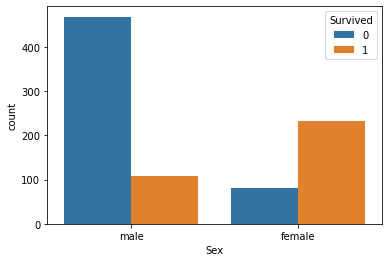

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
male      577
female    314
Name: Sex, dtype: int64


In [66]:
# Visualize with a countplot
sns.countplot(x="Sex", hue="Survived", data=df)
plt.show()

# Proportion of people survived for each class
print(df["Survived"].groupby(df["Sex"]).mean())

# How many people we have in each class?
print(df["Sex"].value_counts())

# Hypothesis

### 1.Determine if the survival rate is associated to the class of passenger.

Let's check how the passesnger class (Pclass) impacted the survival of the passengers.

In [67]:
total_passenger_count = len(df['Pclass'])
first_count = (df['Pclass'] == 1).sum()
second_count = (df['Pclass'] == 2).sum()
third_count = (df['Pclass'] == 3).sum()

per_first =  first_count / total_passenger_count * 100
per_second = second_count / total_passenger_count * 100
per_third = third_count / total_passenger_count * 100

In [68]:
print('First class percentage = ', per_first_class, '  Count: ', first_class_count)
print('Second class percentage = ', per_second_class, '  Count: ', second_class_count)
print('Third class percentage = ', per_third_class, '  Count: ', third_class_count)

First class percentage =  24.242424242424242   Count:  216
Second class percentage =  20.65095398428732   Count:  184
Third class percentage =  55.106621773288445   Count:  491


With these survival rates, we can see that:

The first class represents ≈ 24% of the passengers, but ≈ 40% of the survivors\
The second class represents ≈ 20% of the passengers, but ≈ 25% of the survivors\
The third class representes ≈ 55% of the passengers, but ≈ 34% of the survivors

In [69]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


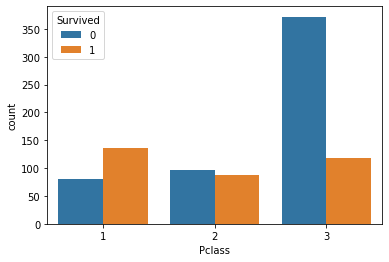

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
3    491
1    216
2    184
Name: Pclass, dtype: int64


In [72]:
# Visualize with a countplot                       (1=Survived, 0=Not Survived)
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.show()

# Proportion of people survived for each class
print(df["Survived"].groupby(df["Pclass"]).mean())

# How many people we have in each class?
print(df["Pclass"].value_counts())

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

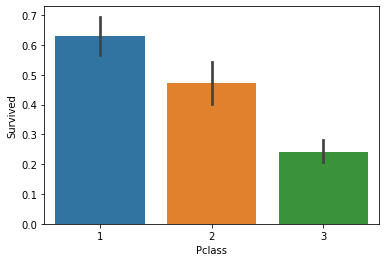

In [73]:
#df.groupby('Pclass').Survived.mean().plot(kind='bar')
sns.barplot(x='Pclass', y='Survived', data=df)

From the above two graph we can see that higher class passengers have better survival chance. 
Therefore, we can say that the hypothesis is correct, survival rate is associated to the class of passesnger.

### 2.Determine if the survival rate is associated to the gender
Now we will analyze if there is any relation between gender and survival rate. First, we'll get the count of survivals and deaths by gender.

In [74]:
df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


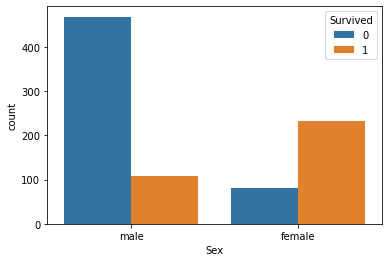

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
male      577
female    314
Name: Sex, dtype: int64


In [41]:
# Visualize with a countplot
sns.countplot(x="Sex", hue="Survived", data=df)
plt.show()

# Proportion of people survived for each class
print(df["Survived"].groupby(df["Sex"]).mean())

# How many people we have in each class?
print(df["Sex"].value_counts())

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

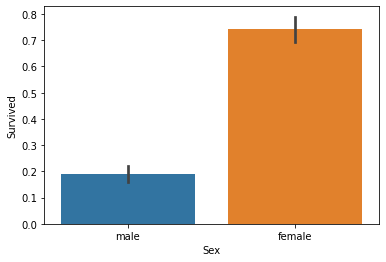

In [44]:
#df.groupby('Sex').Survived.mean().plot(kind='bar')
sns.barplot(x='Sex', y='Survived', data=df)

From the above two graph we can se that Females had better survival chance. 
Therefore, we can say that the survival rate is associated to the gender of the passesnger.

### 3.Determine the survival rate is associated to the age

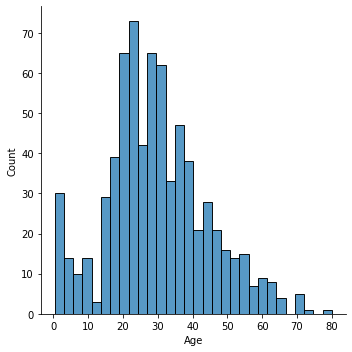

In [12]:
#Determine the survival rate is associated to the age
sns.displot(df['Age'].dropna(), kde=False, bins=30)


In [46]:
df_age = df[['Age' , 'Survived']].dropna(how='any')
df_age['Age'] = (np.floor(df_age['Age'])).astype(int)
df_age.shape

(714, 2)

In [47]:
print('Yougest passenger: ' + str(df_age['Age'].min() * 12) + ' months old')
print('\nOldest passenger: ' + str(df_age['Age'].max()) + ' years old')

Yougest passenger: 0 months old

Oldest passenger: 80 years old


We rounded the ages up for the sake of this analysis, so the youngest passenger on board was a few months old, and the oldest was 80 years old.\
Now let' order our data and create a new DataFrame df_ages_survival. It will Age indexed. Four each age, 4 columns will give us the following information:

Number of passengers of index age that survived\
Number of passengers of index age that died\
Total number of passengers of index age\
Percentage of survivors of that index age

In [48]:
ages_list = df_age['Age'].unique()
ages_list.sort()
ages_list

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 70,
       71, 74, 80])

In [49]:
df_ages_survival = pd.DataFrame(index=ages_list, columns=['Survived', 'Deaths', 'Total', 'Percentage'])

df_ages_survival['Survived'] = df_age.groupby('Age')['Survived'].sum()
df_ages_survival['Total'] = df_age.groupby('Age').count()
df_ages_survival['Deaths'] = df_ages_survival['Total'] - df_ages_survival['Survived']
df_ages_survival['Percentage'] = round(df_age.groupby('Age')['Survived'].mean() * 100, 2)

df_ages_survival.head()

,Survived,Deaths,Total,Percentage
0,7,0,7,100.00
1,5,2,7,71.43
2,3,7,10,30.00
3,5,1,6,83.33
4,7,3,10,70.00


Let's take a look at a scatter plot of our data, and see if we can identify any outliers.

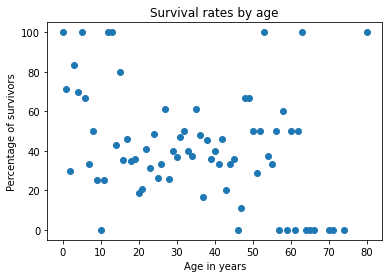

In [50]:
x = df_ages_survival['Percentage'].index
y = df_ages_survival['Percentage']
plt.scatter(x, y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.title('Survival rates by age')
plt.xlabel('Age in years')
plt.ylabel('Percentage of survivors')
plt.show()

We can identify a tendency where the lower y values have high x coordinates, and high y values have low x coordinates. This means that apparently, the younger you are, the more chances you have to survive.

However, there are three dots on the upper right side of the graph that seem to be outliers. They are not representative of the general tendency: let's identify them, remove them from the DataFrame, plot it again and fit a regression line.

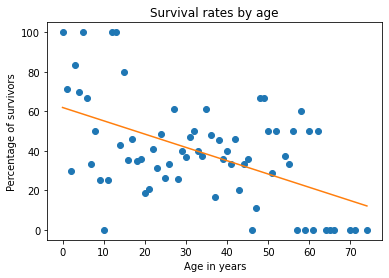

In [51]:
df_ages_survival = df_ages_survival.drop(df_ages_survival[(df_ages_survival['Percentage'] == 100) & (df_ages_survival.index > 50)].index)
x = df_ages_survival['Percentage'].index
y = df_ages_survival['Percentage']
plt.scatter(x, y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-')
plt.title('Survival rates by age')
plt.xlabel('Age in years')
plt.ylabel('Percentage of survivors')
plt.show()

In [ ]:
The regression line clearly shows that the younger you were, the higher your chances to survive.

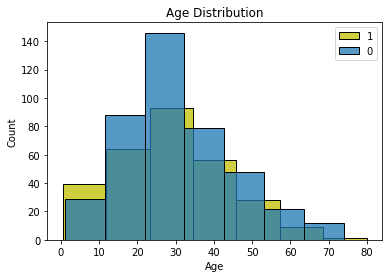

In [52]:
# Survived by age
sns.histplot(df[df.Survived==1]["Age"],color="y", bins=7, label="1")

# Death by age
sns.histplot(df[df.Survived==0]["Age"], bins=7, label="0")
plt.legend()
plt.title("Age Distribution")
plt.show()

We can definitely see a spike in the distribution of survival passengers when the age is small, indicating children had a higher survival rate.

It would seem that children up to 10 years old had a higher chance of survival than people over 10 years old.

From the above graphs we can say that the younger you were, the higher your chances to survive. Therefore, we can say that the survival rate is associated with the age of the passenger.